In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Customer Conversion Prediction Project
>The objective of this project is to build a machine learning model using the historical marketing data of an insurance company to predict whether a Customer will subscribe to the insurance. This prediction will help identify the customers who are most likely to convert, allowing for targeted telephonic marketing campaigns and cost-effective outreach strategies.

# Data Dictionary


age : age of the Customer.

job : type of job.

marital : marital status.

educational_qual : education status.

call_type : contact communication type.

day : last contact day of the month.

mon : last contact month of year.

dur : last contact duration, in seconds.

num_calls : number of contacts performed during this campaign and for this Customer.

prev_outcome : outcome of the previous marketing campaign.

y - Target variable subscribed or not(Y/N)

>This is a supervised learning problem where we aim to predict the target variable.
>It's a binary classification problem with two classes: "yes" and "no" based on the target variable.


# Importing Libraries

In [68]:
# Data Analysis & Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MODEL BUILDING
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score

# Visualization modifires
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [69]:
df = pd.read_csv("/content/drive/MyDrive/Customer_project/train.csv")

# Data Understanding

In [70]:
df.head(10)

age           job   marital education_qual call_type  day  mon  dur  \
0   58    management   married       tertiary   unknown    5  may  261   
1   44    technician    single      secondary   unknown    5  may  151   
2   33  entrepreneur   married      secondary   unknown    5  may   76   
3   47   blue-collar   married        unknown   unknown    5  may   92   
4   33       unknown    single        unknown   unknown    5  may  198   
5   35    management   married       tertiary   unknown    5  may  139   
6   28    management    single       tertiary   unknown    5  may  217   
7   42  entrepreneur  divorced       tertiary   unknown    5  may  380   
8   58       retired   married        primary   unknown    5  may   50   
9   43    technician    single      secondary   unknown    5  may   55   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no  
5          1      unknown  no  
6          1      unknown  no  
7          1      unknown  no  
8          1      unknown  no  
9          1      unknown  no

In [71]:
### shape of the data
df.shape

(45211, 11)

In [72]:
##datafram information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


From above output we can observe that 7 categorical & 4 numerical Attributes

In [73]:
# Describing the data :
df.describe()


age           day           dur     num_calls
count  45211.000000  45211.000000  45211.000000  45211.000000
mean      40.936210     15.806419    258.163080      2.763841
std       10.618762      8.322476    257.527812      3.098021
min       18.000000      1.000000      0.000000      1.000000
25%       33.000000      8.000000    103.000000      1.000000
50%       39.000000     16.000000    180.000000      2.000000
75%       48.000000     21.000000    319.000000      3.000000
max       95.000000     31.000000   4918.000000     63.000000

In [74]:

df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [75]:

for col in df.select_dtypes(include= np.number).columns:
  print(f'{col} : {df[col].unique()}')
  print('--------------------------------------------')


age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
--------------------------------------------
dur : [ 261  151   76 ... 1298 1246 1556]
--------------------------------------------
num_calls : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
--------------------------------------------


In [76]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

The dur column has more unique values comparing other columns


In [77]:

for col in df.select_dtypes(exclude= np.number).columns:
  print(f'{col} : {df[col].unique()}')
  print('--------------------------------------------')


job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------
marital : ['married' 'single' 'divorced']
--------------------------------------------
education_qual : ['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------
call_type : ['unknown' 'cellular' 'telephone']
--------------------------------------------
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------------------------------------
prev_outcome : ['unknown' 'failure' 'other' 'success']
--------------------------------------------
y : ['no' 'yes']
--------------------------------------------


# Data Cleaning

## Handling Duplicates

In [78]:

df.duplicated().sum()

6

There are 6 duplicate records present in our dataset.

In [79]:
df = df.drop_duplicates()

I removed those 6 records

In [80]:

df.duplicated().sum()

0

In [81]:
df.shape


(45205, 11)

# Handling Null

In [82]:

df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no null values currently because the null values are all filled with "unknown".

In [83]:
#to count the unknown values present in the dataframe
has_unknown = df == "unknown"
columnwise_results = has_unknown.sum()
columnwise_results


age                   0
job                 288
marital               0
education_qual     1857
call_type         13017
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36953
y                     0
dtype: int64

In [84]:

for col in df.select_dtypes(exclude=np.number).columns:
  print(f'{col} : ')
  print(f'{df[col].value_counts()}')
  print('--------------------------------------------')

job : 
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------
marital : 
married     27210
single      12788
divorced     5207
Name: marital, dtype: int64
--------------------------------------------
education_qual : 
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64
--------------------------------------------
call_type : 
cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64
--------------------------------------------
mon : 
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64
----------------

In [85]:
prev = df['prev_outcome'].value_counts()/len(df)*100
prev


unknown    81.745382
failure    10.841721
other       4.070346
success     3.342551
Name: prev_outcome, dtype: float64

Nearly 37,000 of values are missing that is 81% in the prev_outcome column

In [86]:

for col in df.select_dtypes(include=np.number).columns:
  print(f'{col} : ')
  print(f'{df[col].value_counts().head()}')
  print('--------------------------------------------')

age : 
32    2084
31    1996
33    1972
34    1929
35    1894
Name: age, dtype: int64
--------------------------------------------
day : 
20    2752
18    2308
21    2026
17    1939
6     1932
Name: day, dtype: int64
--------------------------------------------
dur : 
124    187
90     184
89     177
104    175
122    175
Name: dur, dtype: int64
--------------------------------------------
num_calls : 
1    17542
2    12503
3     5521
4     3520
5     1764
Name: num_calls, dtype: int64
--------------------------------------------


we can fill the null value with the mode value because we are having high difference between the value counts

In [87]:
df.replace("unknown", np.nan, inplace=True)

In [88]:

df.isnull().sum()

age                   0
job                 288
marital               0
education_qual     1857
call_type         13017
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36953
y                     0
dtype: int64

In [89]:
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [90]:

df.isnull().sum()



age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# Handling Outliers

Outlier Detection:

>IQR = Q3(75%)-Q1(25%)

>Upper Threshold = Q3 + (1.5 * IQR)

>Lower Threshold = Q1 - (1.5 * IQR)


Outlier Correction:

>clipping method

In [91]:
df.describe()

age          day           dur     num_calls
count  45205.000000  45205.00000  45205.000000  45205.000000
mean      40.937087     15.80688    258.183055      2.763898
std       10.619130      8.32234    257.538504      3.098189
min       18.000000      1.00000      0.000000      1.000000
25%       33.000000      8.00000    103.000000      1.000000
50%       39.000000     16.00000    180.000000      2.000000
75%       48.000000     21.00000    319.000000      3.000000
max       95.000000     31.00000   4918.000000     63.000000

In [92]:
num_columns = df.select_dtypes(include=np.number).columns
num_columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

In [93]:

def Boxplot(col):
    plt.figure(figsize=(15, 10))
    x=1
    for i in col:
        plt.subplot(2, 2, x)
        sns.boxplot(x=i, data=df, palette='Paired')
        plt.title(f'Box plot of {i}', fontweight='black', fontsize=20, pad=20 )
        x += 1
    plt.tight_layout()
    plt.show()


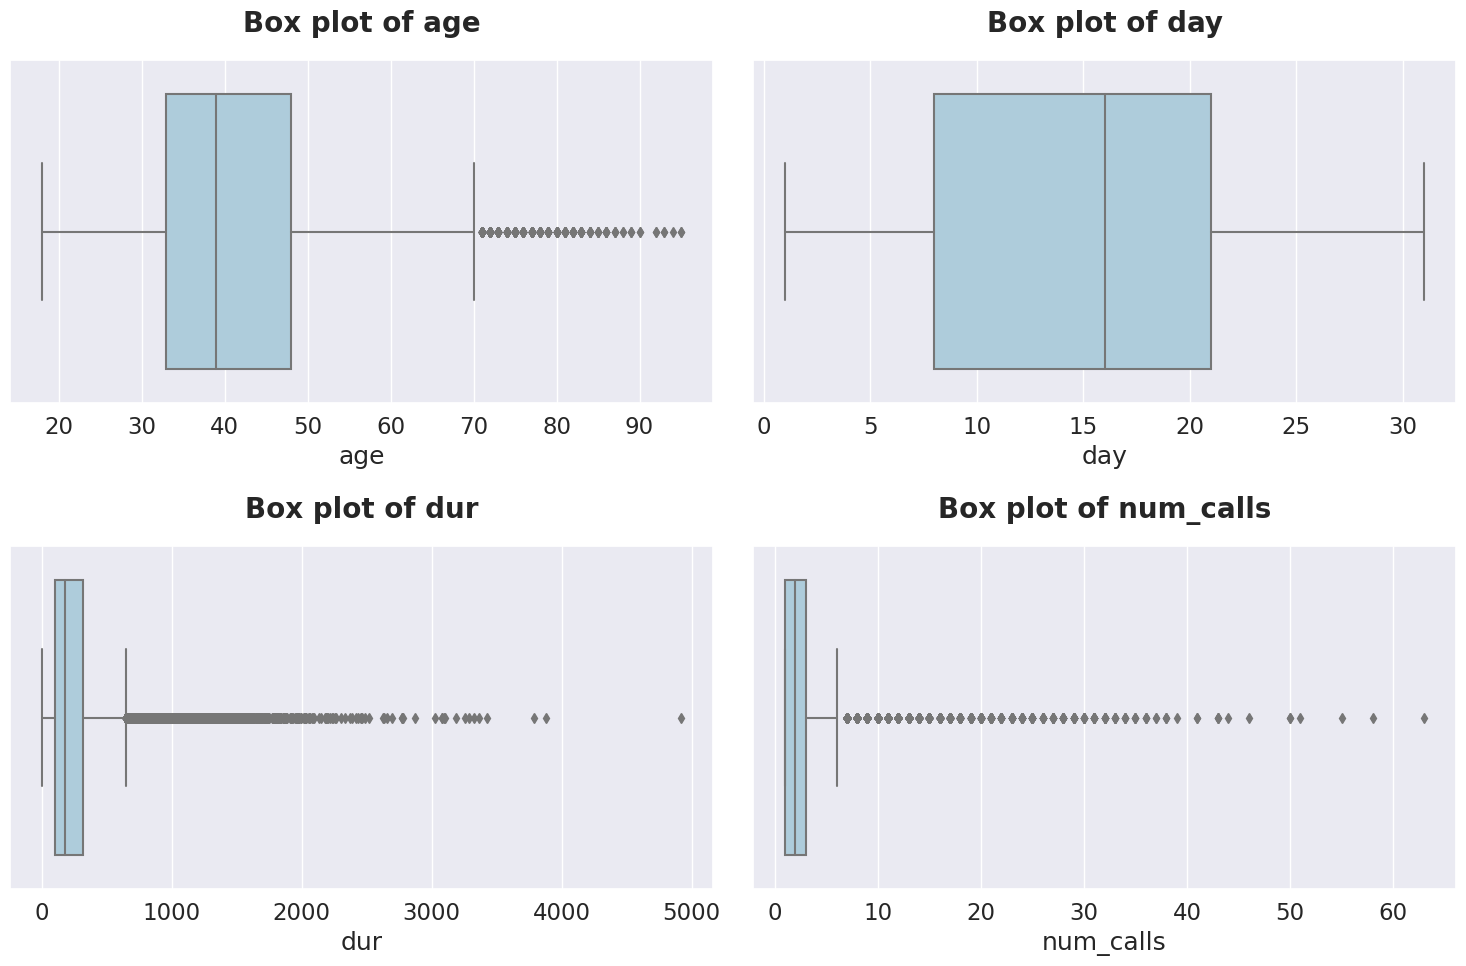

In [94]:

Boxplot(['age', 'day', 'dur', 'num_calls'])


From the box plot, we can infer the presence of outliers.

# Removing Outliers

In [95]:

out_columns = ['age','dur', 'num_calls']
for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])
  IQR =  q3 - q1 #(75 - 25)
  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Lower = q1 + 1.5 * IQR  #(75 + 1.5 * IQR)
  print(f'{i} = IQR : {IQR}, Lower Threshold : {Lower}, Upper Threshold : {Upper}')


age = IQR : 15.0, Lower Threshold : 55.5, Upper Threshold : 70.5
dur = IQR : 216.0, Lower Threshold : 427.0, Upper Threshold : 643.0
num_calls = IQR : 2.0, Lower Threshold : 4.0, Upper Threshold : 6.0


In [96]:
out_columns = ['age', 'dur', 'num_calls']

IQR_value = []
Lower_Threshold = []
Upper_Threshold = []

for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])

  IQR =  q3 - q1 #(75 - 25)
  IQR_value.append(IQR)

  Lower = q1 - 1.5 * IQR  #(75 - 1.5 * IQR)
  Lower_Threshold.append(Lower)

  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Upper_Threshold.append(Upper)

out = {'Column name' : out_columns, 'IQR' : IQR_value, 'Lower Threshold' : Lower_Threshold, 'Upper Threshold' : Upper_Threshold}
out_df = pd.DataFrame(out)
out_df

Column name    IQR  Lower Threshold  Upper Threshold
0         age   15.0             10.5             70.5
1         dur  216.0           -221.0            643.0
2   num_calls    2.0             -2.0              6.0

# Clipping Outliers

In [97]:
out_columns = ['age', 'day', 'dur', 'num_calls']

IQR_value = []
Lower_Threshold = []
Upper_Threshold = []

for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])

  IQR =  q3 - q1 #(75 - 25)
  IQR_value.append(IQR)

  Lower = q1 - 1.5 * IQR  #(75 - 1.5 * IQR)
  Lower_Threshold.append(Lower)

  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Upper_Threshold.append(Upper)
  df[i] = df[i].clip(Lower,Upper)
out = {'Column name' : out_columns, 'IQR' : IQR_value, 'Lower Threshold' : Lower_Threshold, 'Upper Threshold' : Upper_Threshold}
out_df = pd.DataFrame(out)
out_df

Column name    IQR  Lower Threshold  Upper Threshold
0         age   15.0             10.5             70.5
1         day   13.0            -11.5             40.5
2         dur  216.0           -221.0            643.0
3   num_calls    2.0             -2.0              6.0

#checking outliers after clipping

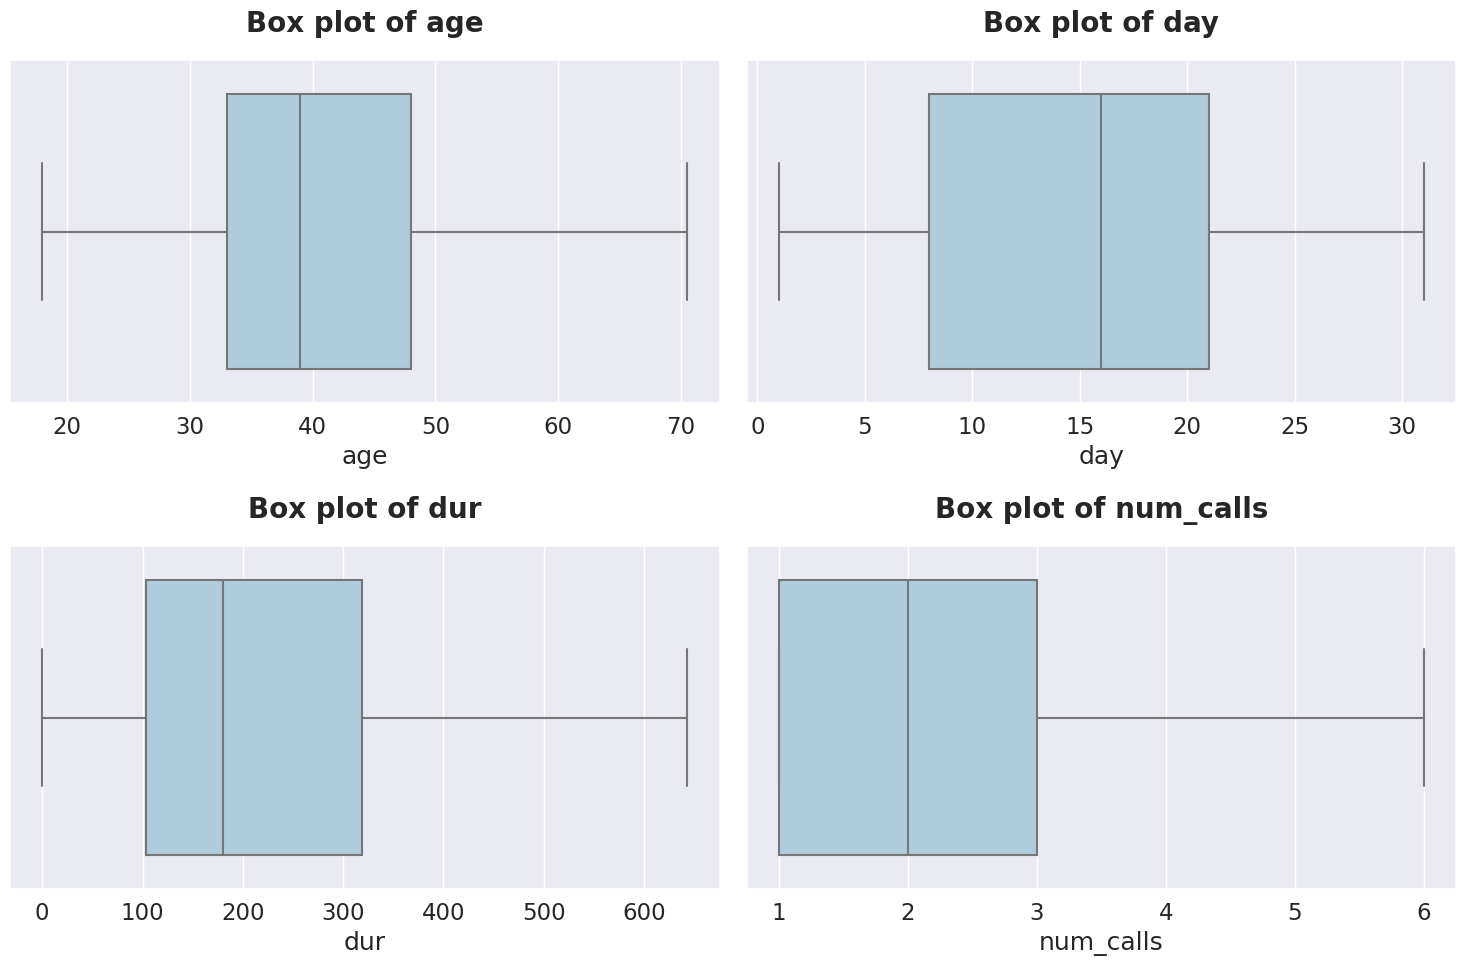

In [98]:

Boxplot(['age', 'day', 'dur', 'num_calls'])

In [99]:

df.describe()

age          day          dur     num_calls
count  45205.000000  45205.00000  45205.00000  45205.000000
mean      40.869052     15.80688    234.95620      2.392235
std       10.395247      8.32234    176.75476      1.600152
min       18.000000      1.00000      0.00000      1.000000
25%       33.000000      8.00000    103.00000      1.000000
50%       39.000000     16.00000    180.00000      2.000000
75%       48.000000     21.00000    319.00000      3.000000
max       70.500000     31.00000    643.00000      6.000000

We have detected and removed outliers from all numerical columns, completing the data cleaning process.



# Exploratory Data Analysis (EDA)
>Target Variable ' y '


In [100]:
df['y'].value_counts()


no     39916
yes     5289
Name: y, dtype: int64

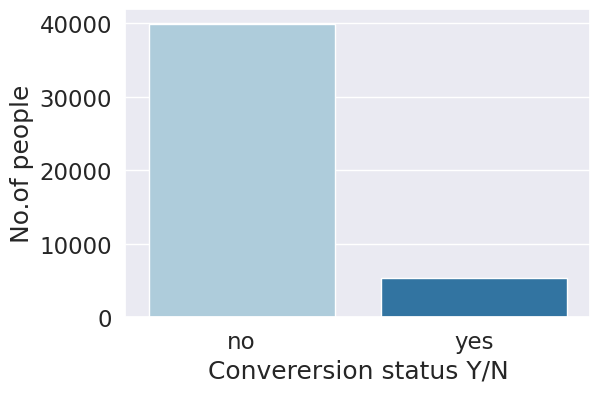

In [101]:

plt.figure(figsize=(6, 4))
sns.countplot(x=df['y'],palette='Paired')
plt.xlabel('Converersion status Y/N')
plt.ylabel('No.of people')
plt.show()

In [102]:
print("percentage of no in the target variable : ",((39922)/(39922+5289))*100) # percentage of no in the target variable
print("percentage of yes in the target variable : ",((5289)/(39922+5289))*100)  # percentage of yes in the target

percentage of no in the target variable :  88.30151954170445
percentage of yes in the target variable :  11.698480458295547


**Imbalanced Dataset**
>Based on our analysis, we have determined that the given data is imbalanced.

>The target column exhibits class imbalance, majority class representing "no" - (88.30%) minority class representing "yes" - (11.69%).


# Categorical Features Visualization

In [103]:
categorical_columns = df.select_dtypes(exclude=np.number)
categorical_columns.head(5)


job  marital education_qual call_type  mon prev_outcome   y
0    management  married       tertiary  cellular  may      failure  no
1    technician   single      secondary  cellular  may      failure  no
2  entrepreneur  married      secondary  cellular  may      failure  no
3   blue-collar  married      secondary  cellular  may      failure  no
4   blue-collar   single      secondary  cellular  may      failure  no

In [104]:
#  Function to visualize categorical_features

def categorical_features(col):
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, palette='Paired', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontweight='black', pad=20, fontsize=20)
    plt.xticks(rotation=90)

    total = len(df[col])
    for i in plt.gca().patches:
        height = i.get_height()
        percentage = f'{(height / total) * 100:.2f}%'
        plt.gca().annotate(percentage, (i.get_x() + i.get_width() / 2, height), ha='center', fontsize=8)

    plt.subplot(1, 2, 2)
    sns.countplot(x=col, hue='y', data=df, palette='Paired', order=df[col].value_counts().index)
    plt.title(f'{col} vs Target (y)', fontweight='black', pad=20, fontsize=20)
    plt.xticks(rotation=90)

    for i in plt.gca().patches:
        height = i.get_height()
        percentage = f'{(height / total) * 100:.2f}%'
        plt.gca().annotate(percentage, (i.get_x() + i.get_width() / 2, height), ha='center',fontsize=8)

    plt.tight_layout()
    plt.show()


# Visualizing job Feature


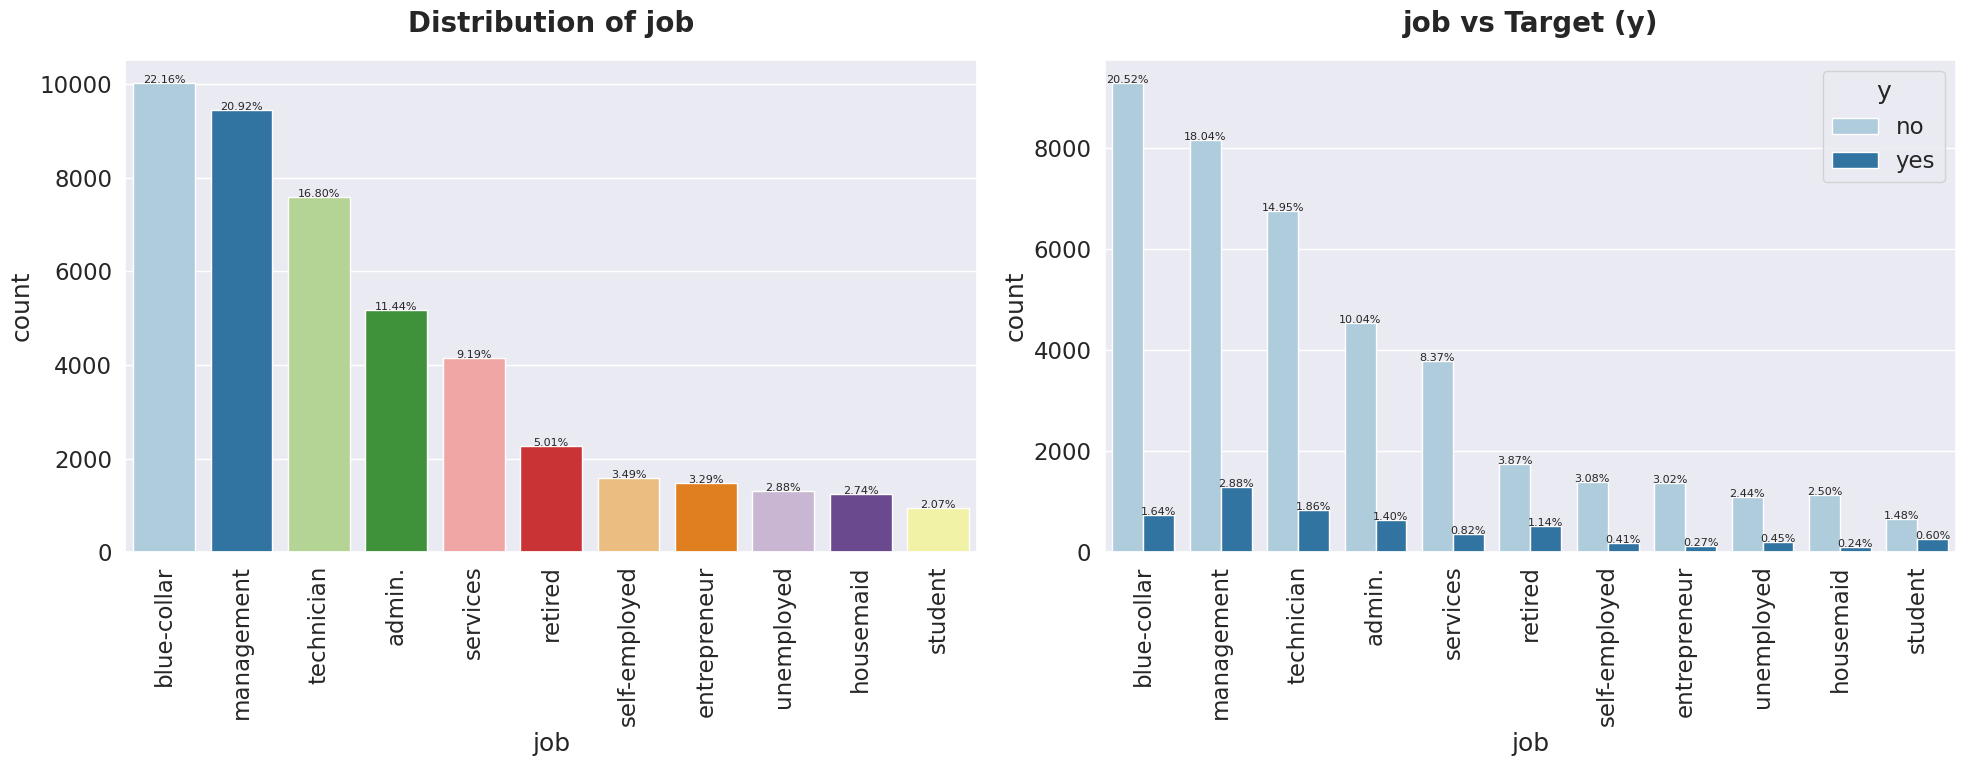

In [105]:

categorical_features('job')


The top three professions that our customers belongs to are

>Management

>blue-collar jobs

>technicians.

Customers having management jobs form the majority amongst those who have converted most.

#Visualizing marital Feature


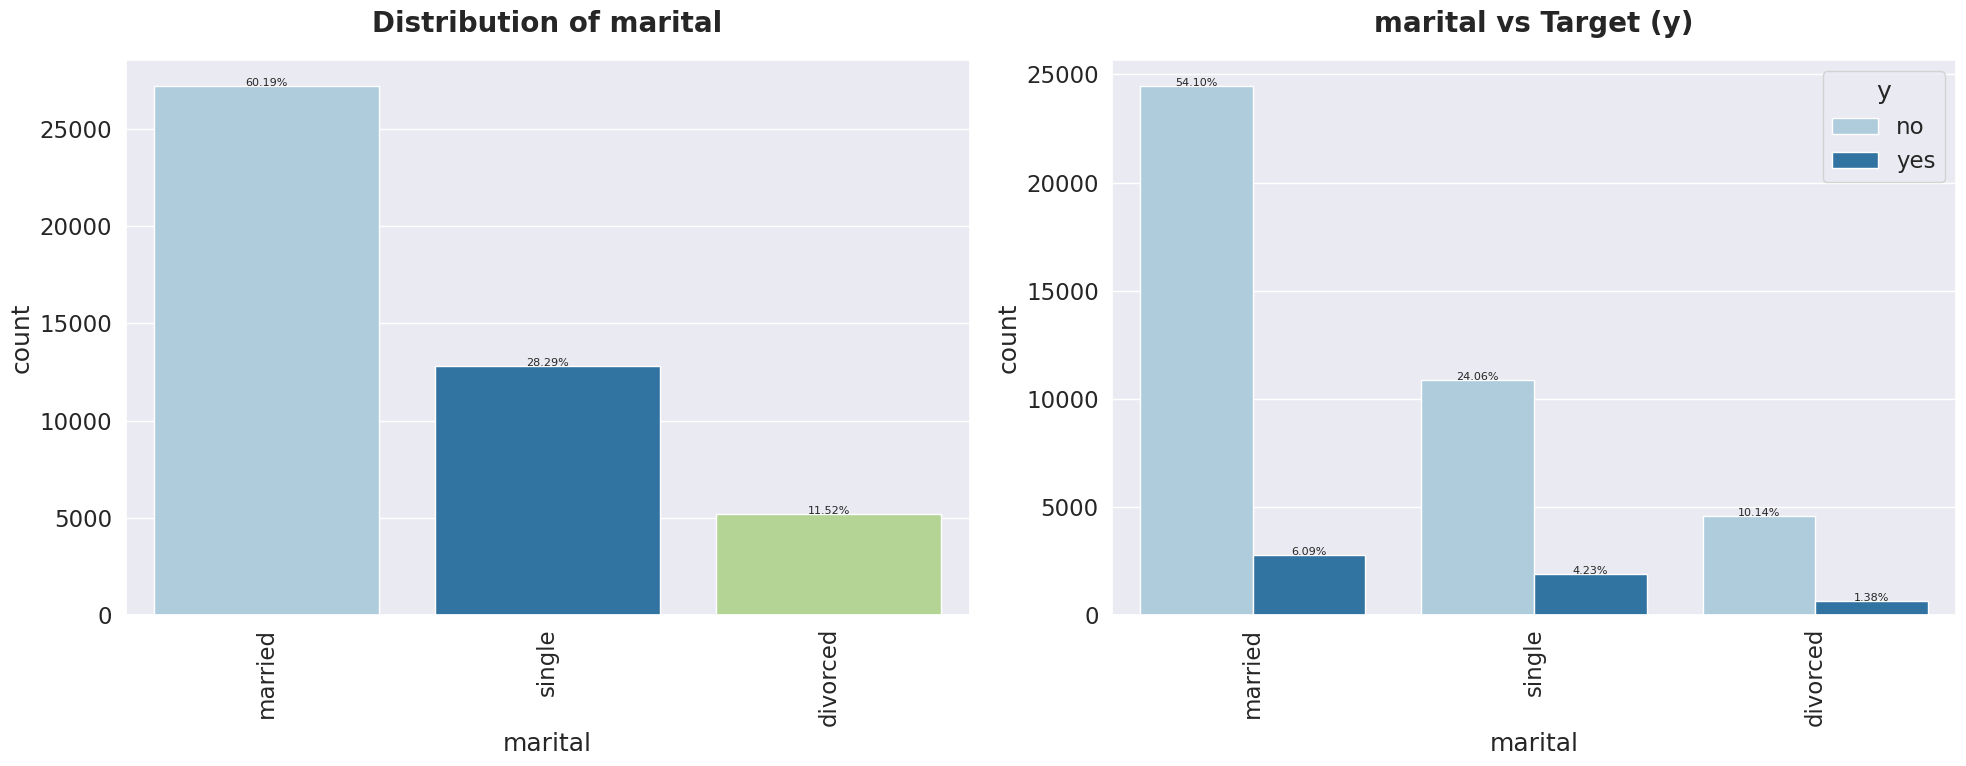

In [106]:

categorical_features('marital')

Majority of the customers are married


# Visualizing education_qual Feature

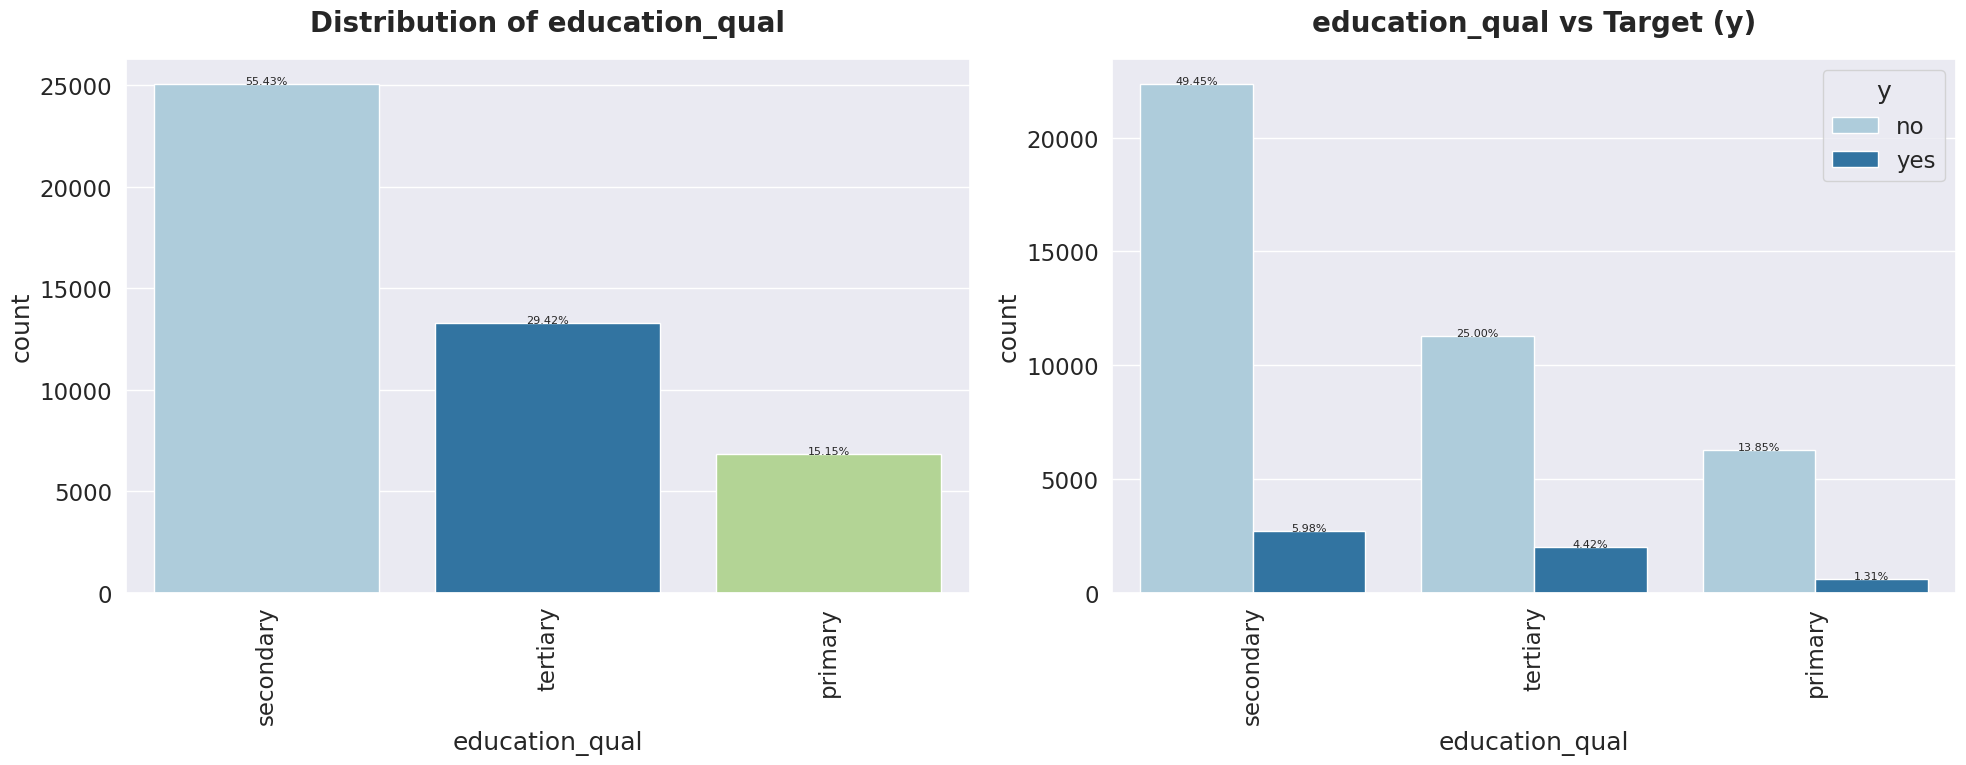

In [107]:
categorical_features('education_qual')

The proportion of individuals with a secondary education level is higher.

Moreover, a significant number of individuals who are qualified with a secondary education level have been converted.


# Visualizing call_type Feature


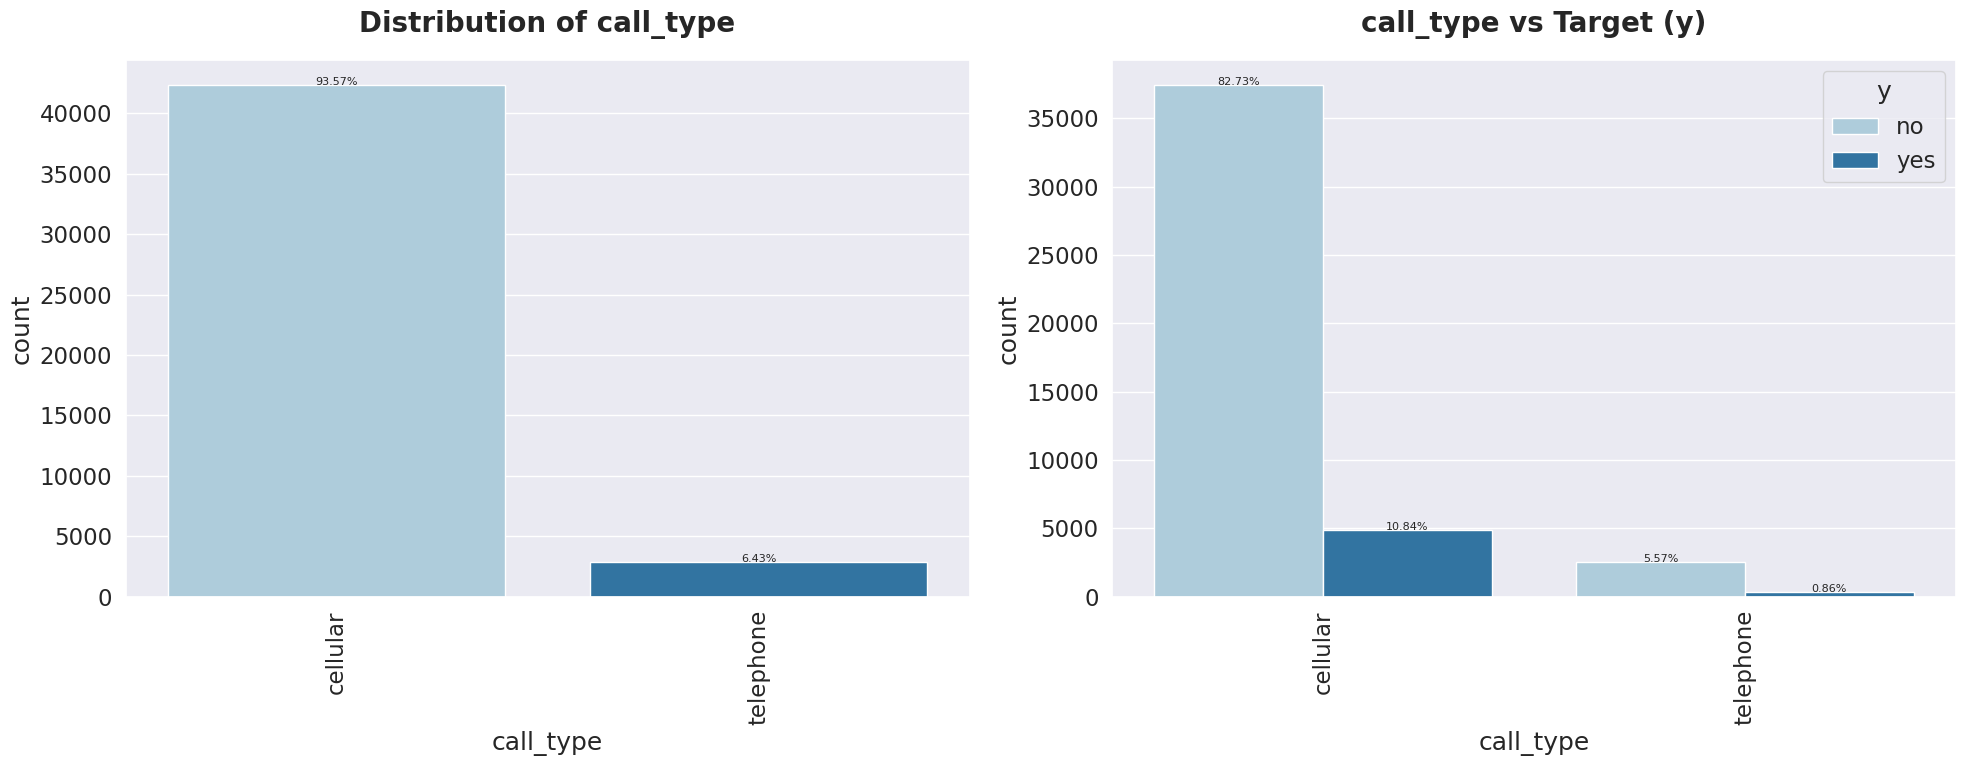

In [108]:
categorical_features('call_type')


The cellular type is the most commonly used communication method among customers.

Cell phones are the preferred mode of contact when reaching out to customers.

A higher number of customers who use cellphones have been converted.


# Visualizing mon Feature


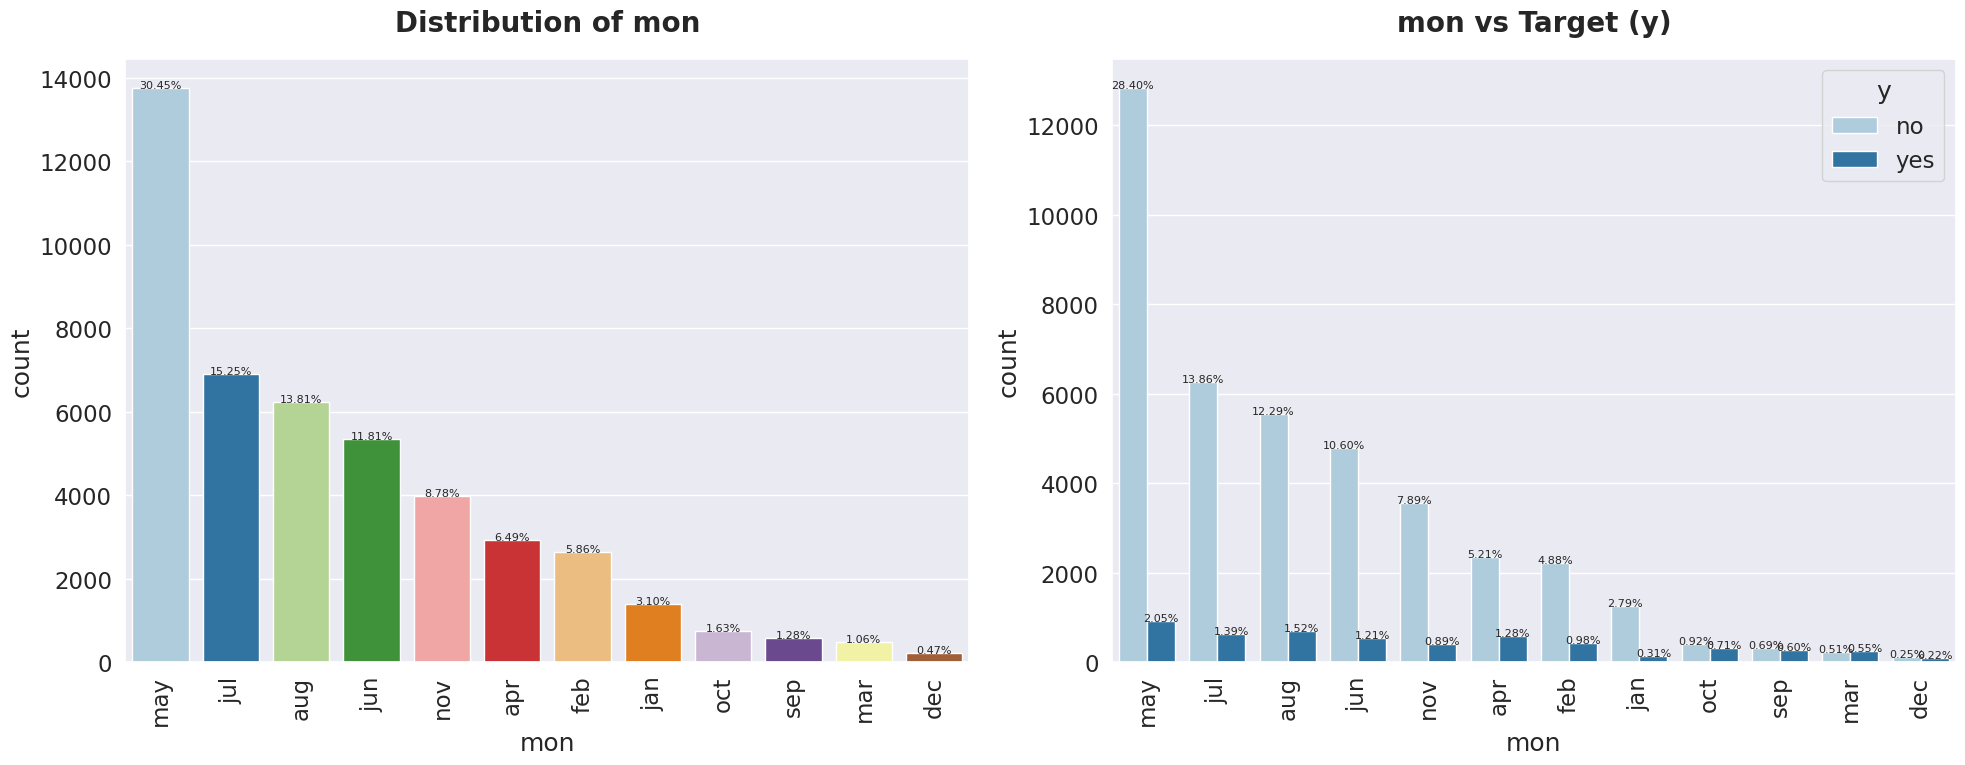

In [109]:
categorical_features('mon')


May is the preferred month for contacting customers.

A significant number of customers have been successfully contacted during this month.


# Visualizing prev_outcome Feature

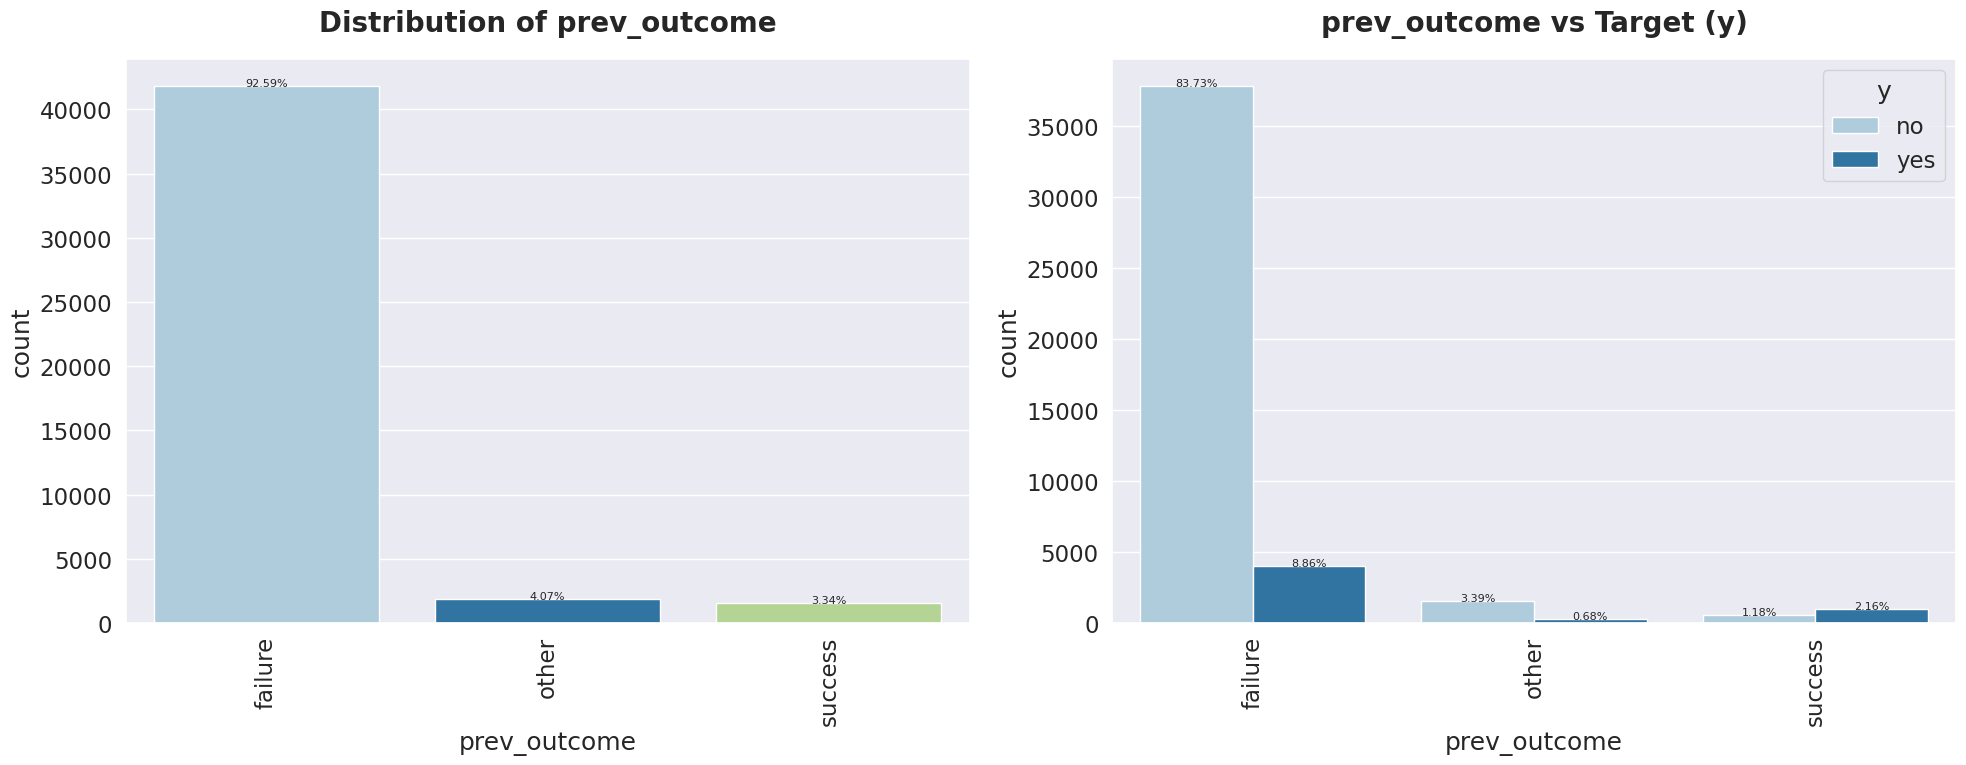

In [110]:
categorical_features('prev_outcome')



In [111]:
numerical_columns = df.select_dtypes(include=np.number)
numerical_columns.head(5)


age  day  dur  num_calls
0  58.0    5  261          1
1  44.0    5  151          1
2  33.0    5   76          1
3  47.0    5   92          1
4  33.0    5  198          1

In [112]:
def Numerical_features(col):
  plt.figure(figsize=(20,17))
  x=1
  for i in col:
    plt.subplot(2,2,x)
    sns.histplot(x=i, hue='y', data=df, kde=True, edgecolor='black')
    plt.title(f'Histogram of {i}', fontweight='black', pad=10, fontsize=20 )
    plt.xticks(rotation=90)
    x += 1

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

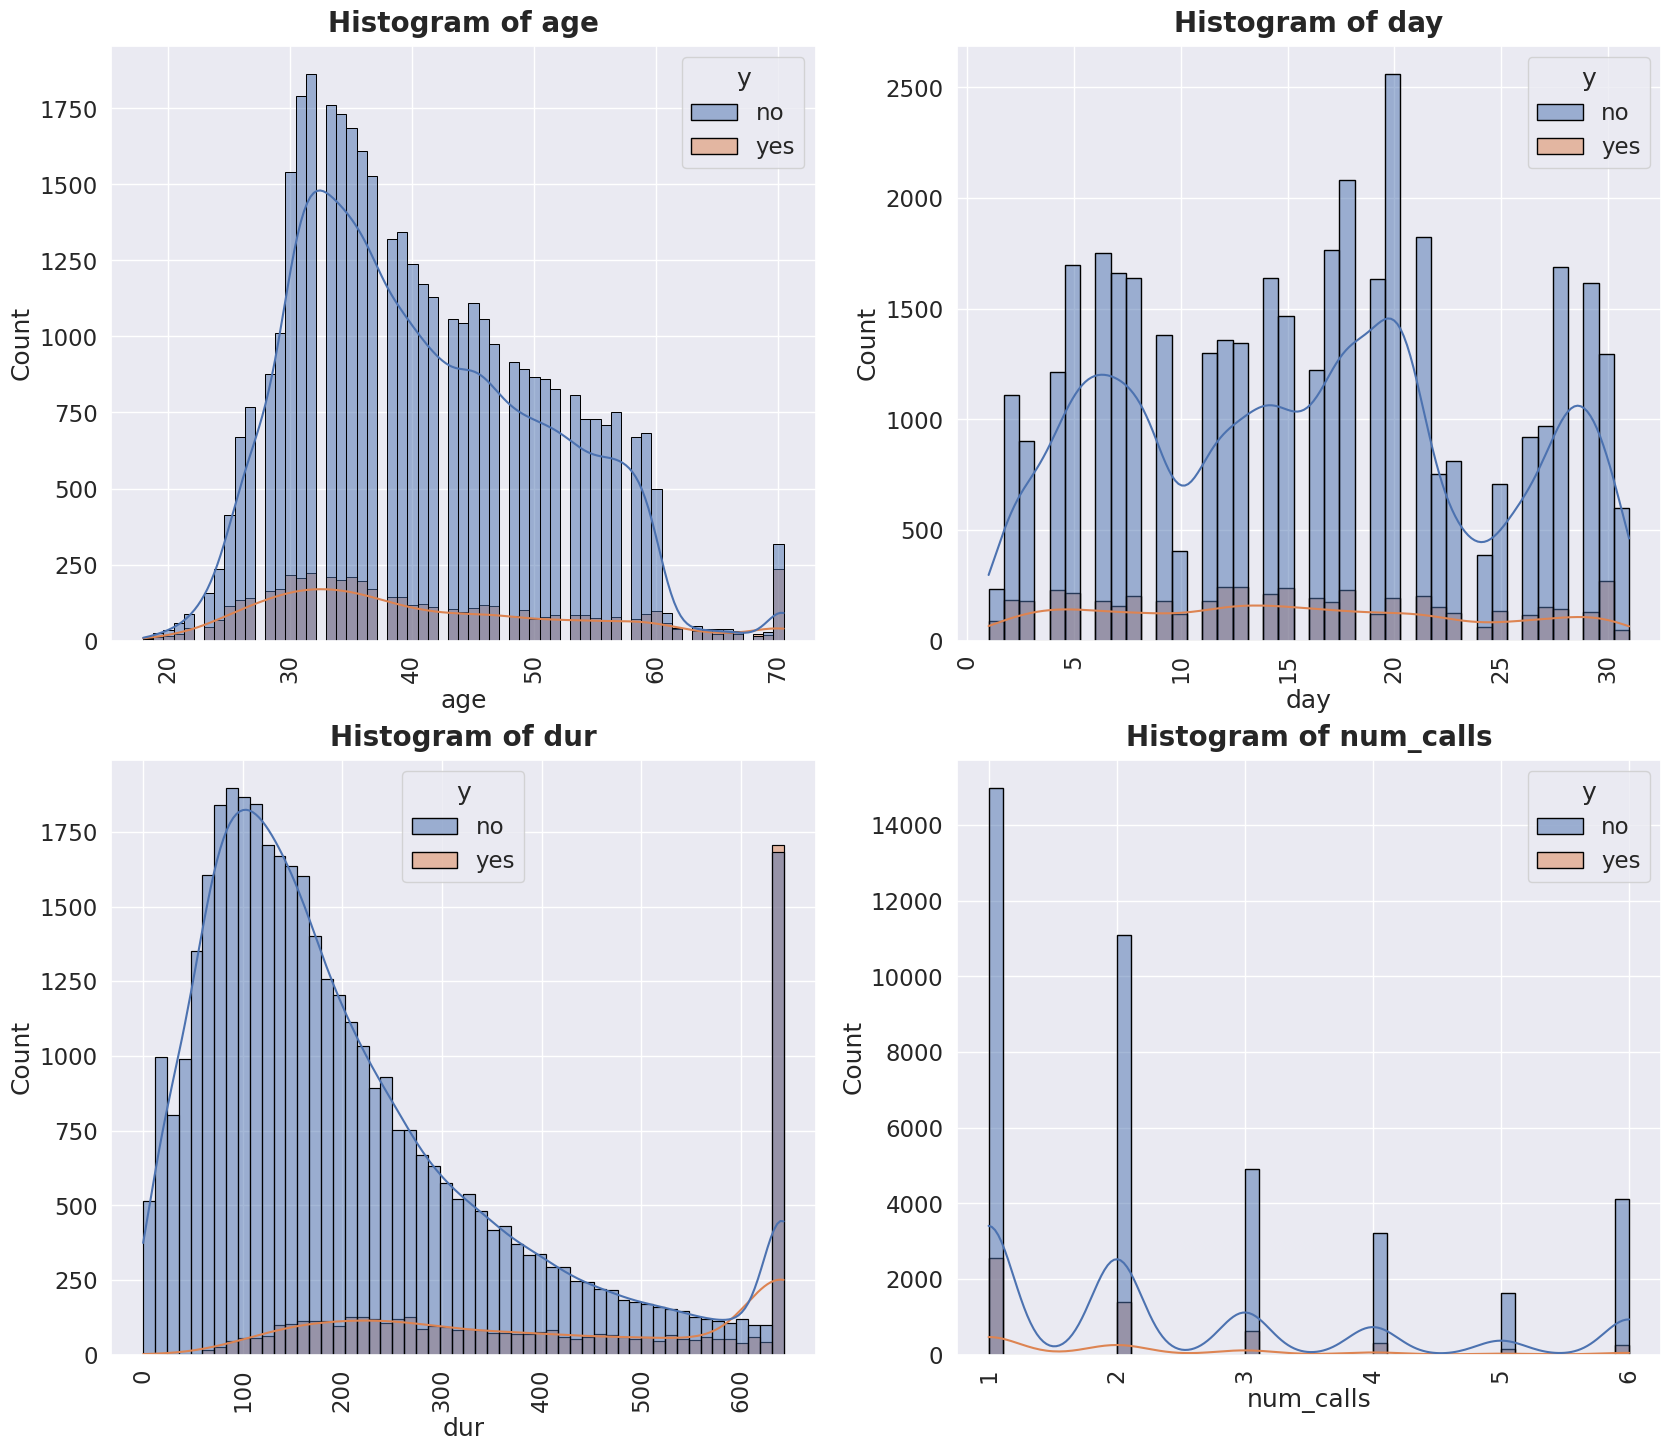

In [113]:
Numerical_features(['age', 'day', 'dur', 'num_calls'])


The majority of the Customer who were contacted fall into the age range of 30-35.

The highest number of calls were made around the 20th day of the month.

Based on the plot for the number of calls, it can be inferred that most Customer responded to the call during the first or second attempt.

The duration of the call is a significant factor in converting customers.


# Data Preprocessing
  >**Encoding**

In [114]:
#column 'y'
df['y'] = df['y'].map({'no':0, 'yes':1})


<function matplotlib.pyplot.show(close=None, block=None)>

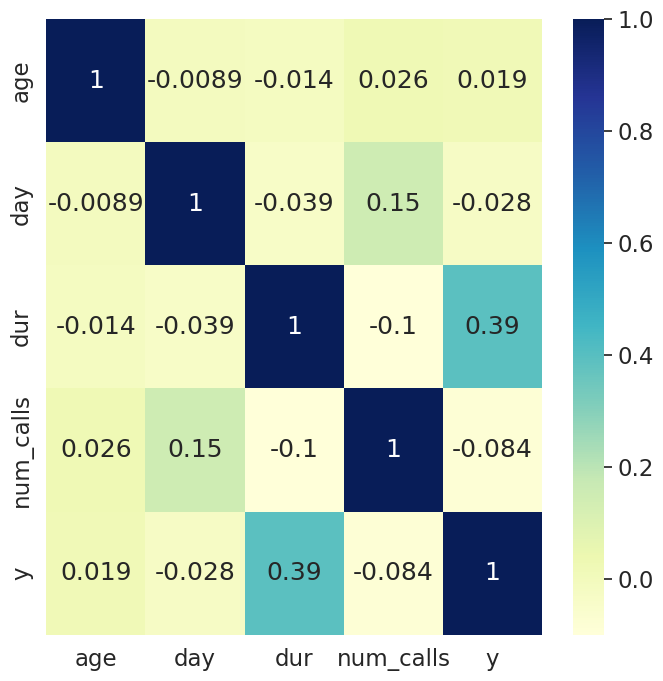

In [115]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show


There are no features that are highly correlated and inversely correlated.



In [116]:

cc = df.select_dtypes(exclude = np.number).columns
cc


Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')

# Label encoding

In [117]:
label_encoder = LabelEncoder()
df['mon'] = label_encoder.fit_transform(df['mon'])



# One hot encoding


In [118]:
df = pd.get_dummies(columns=['job','marital','education_qual','call_type','prev_outcome'], data=df)


In [119]:

df.head()


age  day  mon  dur  num_calls  y  job_admin.  job_blue-collar  \
0  58.0    5    8  261          1  0           0                0   
1  44.0    5    8  151          1  0           0                0   
2  33.0    5    8   76          1  0           0                0   
3  47.0    5    8   92          1  0           0                1   
4  33.0    5    8  198          1  0           0                1   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              0               1            0   
1                 0              0               0            0   
2                 1              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   

   job_unemployed  marital_divorced  marital_married  marital_single  \
0               0                 0                1               0   
1               0                 0                0               1   
2               0                 0                1               0   
3               0                 0                1               0   
4               0                 0                0               1   

   education_qual_primary  education_qual_secondary  education_qual_tertiary  \
0                       0                         0                        1   
1                       0                         1                        0   
2                       0                         1                        0   
3                       0                         1                        0   
4                       0                         1                        0   

   call_type_cellular  call_type_telephone  prev_outcome_failure  \
0                   1                    0                     1   
1                   1                    0                     1   
2                   1                    0                     1   
3                   1                    0                     1   
4                   1                    0                     1   

   prev_outcome_other  prev_outcome_success  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

# Sampling

The imbalanced class distribution in the target variable, with approximately 89% for the majority class and 11% for the minority class, it is necessary to perform resampling to address the imbalance.


In [120]:
X_S = df.drop(['y'],axis=1)
y_S = df['y']


In [121]:
smote = SMOTEENN(sampling_strategy="all")
X,y = smote.fit_resample(X_S,y_S)


In [122]:
print(len(X),len(y))


66140 66140


In [123]:

y.value_counts()


1    37946
0    28194
Name: y, dtype: int64

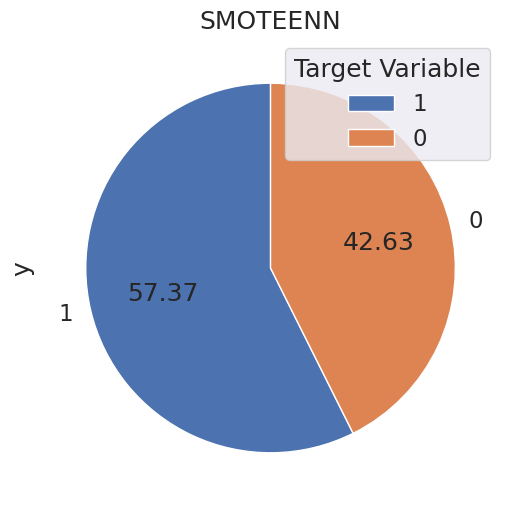

In [124]:

plt.figure(figsize=(6,6))
y.value_counts().plot.pie(autopct='%.2f',startangle = 90)
plt.title("SMOTEENN")
plt.legend(title = "Target Variable")
plt.show()

To tackle the class imbalance in the dataset, I utilized the SMOTEENN oversampling technique.


# Splitting

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [126]:

print('X_train shape -->', X_train.shape)
print('X_test shape -->', X_test.shape)
print('y_train shape -->', y_train.shape)
print('y_test shape -->', y_test.shape)


X_train shape --> (46298, 27)
X_test shape --> (19842, 27)
y_train shape --> (46298,)
y_test shape --> (19842,)


# Feature Scaling

In [127]:
df.head()


age  day  mon  dur  num_calls  y  job_admin.  job_blue-collar  \
0  58.0    5    8  261          1  0           0                0   
1  44.0    5    8  151          1  0           0                0   
2  33.0    5    8   76          1  0           0                0   
3  47.0    5    8   92          1  0           0                1   
4  33.0    5    8  198          1  0           0                1   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              0               1            0   
1                 0              0               0            0   
2                 1              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   

   job_unemployed  marital_divorced  marital_married  marital_single  \
0               0                 0                1               0   
1               0                 0                0               1   
2               0                 0                1               0   
3               0                 0                1               0   
4               0                 0                0               1   

   education_qual_primary  education_qual_secondary  education_qual_tertiary  \
0                       0                         0                        1   
1                       0                         1                        0   
2                       0                         1                        0   
3                       0                         1                        0   
4                       0                         1                        0   

   call_type_cellular  call_type_telephone  prev_outcome_failure  \
0                   1                    0                     1   
1                   1                    0                     1   
2                   1                    0                     1   
3                   1                    0                     1   
4                   1                    0                     1   

   prev_outcome_other  prev_outcome_success  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

In [128]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [129]:

print(X_train)


[[-1.16013383 -1.61939084 -0.74721827 ...  0.54758414 -0.15300002
  -0.21097897]
 [ 0.77350407  0.18389073  0.22437044 ...  0.54758414 -0.15300002
  -0.21097897]
 [ 1.21296723  1.50629722 -1.39494407 ...  0.54758414 -0.15300002
  -0.21097897]
 ...
 [-0.01752962 -1.25873453  0.87209624 ...  0.54758414 -0.15300002
  -0.21097897]
 [-0.19331488 -0.89807821  0.87209624 ...  0.54758414 -0.15300002
  -0.21097897]
 [-0.63277804  1.38607845 -1.39494407 ...  0.54758414 -0.15300002
  -0.21097897]]


In [130]:

print(X_test)

[[ 1.17174798 -1.01829698 -0.42335537 ... -1.82620336 -0.15300002
  -0.21097897]
 [-1.78777879  1.74673477 -0.09949246 ... -1.82620336 -0.15300002
  -0.21097897]
 [-1.24802646 -0.65764067 -1.39494407 ...  0.54758414 -0.15300002
  -0.21097897]
 ...
 [ 1.30828396  0.54454705 -1.71880698 ...  0.54758414 -0.15300002
  -0.21097897]
 [ 0.33404091 -0.29698435 -1.39494407 ...  0.54758414 -0.15300002
  -0.21097897]
 [ 2.57530302  0.42432828  0.87209624 ...  0.54758414 -0.15300002
  -0.21097897]]


# Model Building
#Logistic Regression


In [131]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)
y_pred_lr = Logistic_Regression.predict(X_test)

lr_AUROC = roc_auc_score(y_test, y_pred_lr)*100
lr_Acu = accuracy_score(y_test, y_pred_lr)*100
lr_f1 = f1_score(y_test, y_pred_lr)



print( "AUROC OF Sampled Logistic Regression : ", roc_auc_score(y_test, Logistic_Regression.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF Logistic Regression : ", lr_f1 )
print("Accuracy OF Logistic Regression : ", lr_Acu)
print("AUROC OF Logistic Regression : ", lr_AUROC)


AUROC OF Sampled Logistic Regression :  98.71421012451094
F1 SCORE OF Logistic Regression :  0.954553508150248
Accuracy OF Logistic Regression :  94.82915028726943
AUROC OF Logistic Regression :  94.9691477066652


In [132]:

cmL = confusion_matrix(y_test, y_pred_lr)
cmL


array([[ 8041,   346],
       [  680, 10775]])

# **Decision Tree Classifier**

In [133]:

for depth in [1,2,3,4,5,6,7,8,9,10]:
  Decision_Tree = DecisionTreeClassifier(max_depth=depth)
  Decision_Tree.fit(X_train, y_train)
  Decision_Tree = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(Decision_Tree, X_test, y_test, cv=10)
  print("Depth  : ", depth,"---------", " Cross val score : " ,np.mean(valAccuracy))



Depth  :  1 ---------  Cross val score :  0.7885283273746648
Depth  :  2 ---------  Cross val score :  0.8258229056634436
Depth  :  3 ---------  Cross val score :  0.8395317705370926
Depth  :  4 ---------  Cross val score :  0.8596906486146096
Depth  :  5 ---------  Cross val score :  0.8695186174534817
Depth  :  6 ---------  Cross val score :  0.880505403428943
Depth  :  7 ---------  Cross val score :  0.8942639351588527
Depth  :  8 ---------  Cross val score :  0.9092319919557974
Depth  :  9 ---------  Cross val score :  0.9140197905663445
Depth  :  10 ---------  Cross val score :  0.9198156283009669


In [134]:
Decision_Tree = DecisionTreeClassifier(max_depth=5)
Decision_Tree.fit(X_train, y_train)
y_pred_dt = Decision_Tree.predict(X_test)

dt_AUROC = roc_auc_score(y_test, y_pred_dt)*100
dt_Acu = accuracy_score(y_test, y_pred_dt)*100
dt_f1 = f1_score(y_test, y_pred_dt)

print( "AUROC OF Sampled Decision_Tree  : ", roc_auc_score(y_test, Decision_Tree.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF Decision_Tree : ", dt_f1 )
print("Accuracy OF Decision_Tree : ", dt_Acu )
print("AUROC OF Decision_Tree : ", dt_AUROC )


AUROC OF Sampled Decision_Tree  :  94.77786156237201
F1 SCORE OF Decision_Tree :  0.8900434451560889
Accuracy OF Decision_Tree :  87.62725531700434
AUROC OF Decision_Tree :  87.78964316592935


In [135]:
cmD = confusion_matrix(y_test, y_pred_dt)
cmD

array([[7451,  936],
       [1519, 9936]])

# Random Forest Classifier


In [136]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_test)

rf_AUROC = roc_auc_score(y_test, y_pred_rf)*100
rf_Acu = accuracy_score(y_test, y_pred_rf)*100
rf_f1 = f1_score(y_test, y_pred_rf)


print( "AUROC OF Sampled Random_Forest  : ", roc_auc_score(y_test, Random_Forest.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF Random_Forest : ", rf_f1 )
print("Accuracy OF Random_Forest : ", rf_Acu)
print("AUROC OF Random_Forest : ", rf_AUROC )


AUROC OF Sampled Random_Forest  :  99.36989324325329
F1 SCORE OF Random_Forest :  0.9678098412419962
Accuracy OF Random_Forest :  96.30077613143835
AUROC OF Random_Forest :  96.29639143991265


In [137]:

cmR = confusion_matrix(y_test, y_pred_rf)
cmR


array([[ 8074,   313],
       [  421, 11034]])

# **Gradient Boosting Classifier**

In [138]:
Gradient_Boosting = GradientBoostingClassifier()
Gradient_Boosting.fit(X_train, y_train)
y_pred_gb = Gradient_Boosting.predict(X_test)

gb_AUROC = roc_auc_score(y_test, y_pred_gb)*100
gb_Acu = accuracy_score(y_test, y_pred_gb)*100
gb_f1 = f1_score(y_test, y_pred_gb)

print( "AUROC OF Sampled Gradient_Boosting  : ", roc_auc_score(y_test, Gradient_Boosting.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF Gradient_Boosting : ", gb_f1 )
print("Accuracy OF Gradient_Boosting : ", gb_Acu )
print("AUROC OF Gradient_Boosting : ", gb_AUROC )


AUROC OF Sampled Gradient_Boosting  :  98.71619507169986
F1 SCORE OF Gradient_Boosting :  0.951227034409834
Accuracy OF Gradient_Boosting :  94.42092530994859
AUROC OF Gradient_Boosting :  94.45432349757478


In [139]:
cmG = confusion_matrix(y_test, y_pred_gb)
cmG

array([[ 7940,   447],
       [  660, 10795]])

# **XGB Classifier**

In [140]:
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train, y_train)
y_pred_xgb = XGB_Classifier.predict(X_test)

xgb_AUROC = roc_auc_score(y_test, y_pred_xgb)*100
xgb_Acu = accuracy_score(y_test, y_pred_xgb)*100
xgb_f1 = f1_score(y_test, y_pred_xgb)

print("AUROC OF Sampled XGB_Classifier  : ", roc_auc_score(y_test, XGB_Classifier.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF XGB_Classifier : ", xgb_f1)
print("Accuracy OF XGB_Classifier : ", xgb_Acu)
print("AUROC OF XGB_Classifier : ", xgb_AUROC)


AUROC OF Sampled XGB_Classifier  :  99.43868358135892
F1 SCORE OF XGB_Classifier :  0.9696650885498861
Accuracy OF XGB_Classifier :  96.51244834190102
AUROC OF XGB_Classifier :  96.50526471591914


In [141]:
cmX = confusion_matrix(y_test, y_pred_xgb)
cmX

array([[ 8090,   297],
       [  395, 11060]])

# **Model Performance Comparision**


In [142]:
final_data = pd.DataFrame({
    'Models':['Logistic_Regression','Decision_Tree','Random_Forest','Gradient_Boosting','XGB'],
    'Accuracy':[lr_f1,dt_f1,rf_f1,gb_f1,xgb_f1],
    "F1":[lr_Acu,dt_Acu,rf_Acu,gb_Acu,xgb_Acu],
    "AUROC":[lr_AUROC,dt_AUROC,rf_AUROC,gb_AUROC,xgb_AUROC]
})


In [143]:

final_data


Models  Accuracy         F1      AUROC
0  Logistic_Regression  0.954554  94.829150  94.969148
1        Decision_Tree  0.890043  87.627255  87.789643
2        Random_Forest  0.967810  96.300776  96.296391
3    Gradient_Boosting  0.951227  94.420925  94.454323
4                  XGB  0.969665  96.512448  96.505265

# Feature Importances

In [144]:
feature_importances = pd.DataFrame(Random_Forest.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(7)


importance
dur                     0.403473
prev_outcome_failure    0.084970
age                     0.066598
mon                     0.045824
day                     0.044684
num_calls               0.037306
job_blue-collar         0.036609

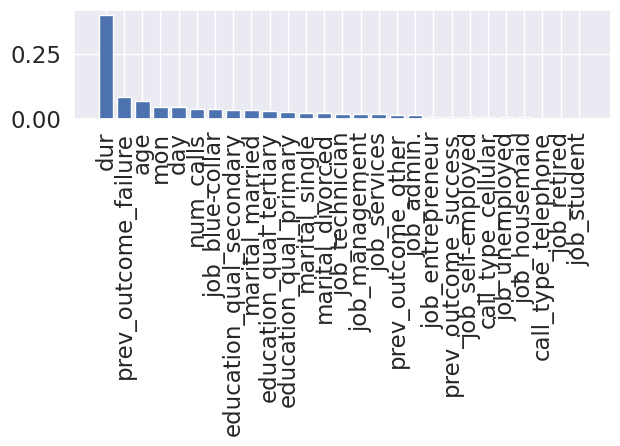

In [145]:
feature_names = X.columns
importances = Random_Forest.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.bar(sorted_feature_names, sorted_importances)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Conclusions

Based on the feature importance analysis conducted by the best machine learning model, the key factors influencing Customer subscription to the insurance are as follows:

Duration: Longer call durations have a stronger influence on Customers, increasing the likelihood of subscription.

>Age: Middle-aged individuals are more likely to subscribe to the insurance, indicating the importance of targeting this age group.

>Day: Subscriptions are more common during the middle of the month, suggesting the significance of this time period for successful marketing campaigns.

>Month: May appears to be a particularly favorable month for insurance subscriptions.

>Job: While blue-collar workers are targeted more frequently, individuals in management positions have a higher subscription rate.

These insights can guide the Customer in focusing on these key features to optimize their marketing strategies and improve the chances of Customer subscription to the insurance.



**Based on the results obtained from the evaluation of all the classification models on the given historical data, XGBoost and Random Forest performed equally well in predicting whether a Customer will subscribe to the insurance or not.

XGBoost achieved a high AUROC score of 96.5%, indicating its effectiveness in classifying the target variable. On the other hand, Random Forest achieved an AUROC score of around 96%, slightly lower than XGBoost.

Both XGBoost and Random Forest models show promise in accurately targeting potential customers and optimizing marketing costs. It is recommended to consider deploying either of these models in the production environment to improve the efficiency and effectiveness of the marketing campaigns.**